In [ ]:
import pandas as pd
import time #to have today's date
timestr = time.strftime("%Y%m%d")
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE #T-distributed Stochastic Neighbor Embedding.
from matplotlib.legend_handler import HandlerLine2D # to handle legends
import matplotlib.patheffects as PathEffects #to get white outline for color
var_text_size = 15 #for font size in graphs

In [2]:
# order of categories should be:
#    ['Energy governance & markets', 'Vested interests', 'Policies', 'Electric power system']

In [3]:
var_no_topics = 22 

In [10]:
var_time_a = '20220517'

In [11]:
#get dataframe with the topic contribution for each document, the country, text etc.

df_d = \
    pd.read_csv('.//results//master_dfs//docs_newNum_topics_country_class_keywords_text_q_'+var_time_a+'_V01.csv',
    sep=';', decimal=',', index_col=0)

In [12]:
#get dataframe with the topics & categories
df_topics_categories = pd.read_csv\
('.//results//master_dfs//category_numname_topics_numname_orinew_keywords_lambda_'+var_time_a+'_V01.csv',
    sep=';', decimal=',', index_col=0)

In [13]:
list_perc_all_t = list()
for x in range(1, var_no_topics+1):
    list_perc_all_t.append('t_'+str(x)+'_perc_cont')

In [14]:
df_perc_only = df_d[list_perc_all_t]

In [15]:
df_perc_only_T = df_perc_only.transpose()

### TNSE explained

t-distributed stochastic neighbor embedding (t-SNE), get similarities between data points

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html <br>
n_componentsint (default = 2) : Dimension of the embedded space. <br>
perplexity, float (default=30) : The perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms. Larger datasets usually require a larger perplexity. Consider selecting a value between 5 and 50. Different values can result in significantly different results. for the algorithm to operate properly, the perplexity really should be smaller than the number of points <br>
n_iter (int, default=1000) :Maximum number of iterations for the optimization. Should be at least 250.<br>
init (‘random’, ‘pca’): Initialization of embedding.<br>
early_exaggeration (float, default=12.0) : Controls how tight natural clusters in the original space are in the embedded space and how much space will be between them. For larger values, the space between natural clusters will be larger in the embedded space. <br>

## scatter plot, each country is a dot (over all topics)

In [50]:
df_country_topics_share = pd.read_csv('.//results//master_dfs//country_topics_share_'+var_time_a+'_V01.csv',
    sep=';', decimal=',', index_col=0)
#so here we have 12 vectors (countries) with 22 dimensions (topics) 

In [52]:
#depends on the country order. Change to old order:
list_old_country_order = ['CL', 'CO', 'DE', 'ID', 'IN', 'KE', 'PH', 'PK', 'UK', 'US', 'VN', 'ZA']


In [53]:
df_country_topics_share_idx = df_country_topics_share.set_index('Country').reindex(list_old_country_order)

In [67]:
#do the TSNE
C_embedded = TSNE(n_components=2, perplexity = 2, learning_rate='auto', random_state=4,
                     init='random').fit_transform(df_country_topics_share_idx)

In [68]:
#turn into dataframe
df_C_embedded = pd.DataFrame(C_embedded).reset_index().rename(columns={0:'x', 1:'y', 'index':'Country_num'})

In [69]:
df_C_embedded['Country'] = list(df_country_topics_share_idx.index)

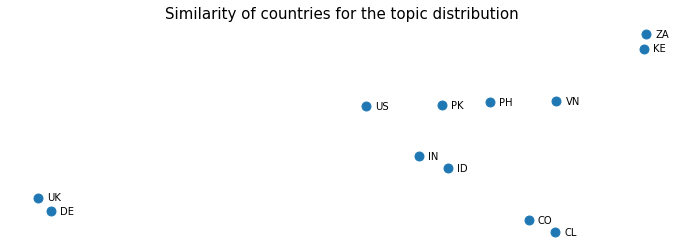

In [70]:
fig, ax1 = plt.subplots(figsize=(12,4))
ax1.scatter(x=df_C_embedded['x'], y=df_C_embedded['y'], s=80) #, color=list_colors_cat)
ax1.set_title('Similarity of countries for the topic distribution', fontsize=var_text_size)

#remove spines
for x in ['top', 'bottom', 'right', 'left']: 
    ax1.spines[x].set_visible(False) 

#remove ticks and labels
ax1.tick_params(left = False, labelleft = False, bottom = False, labelbottom = False)

for x in df_C_embedded.index:
    ax1.annotate(text=df_C_embedded.loc[x, 'Country'], xy = (df_C_embedded.loc[x, 'x']+4, df_C_embedded.loc[x, 'y']), \
                ha='left', va='center')

plt.savefig('.//results//TSNE//countries_'+timestr+'V01.png', \
                   bbox_inches="tight")

plt.show()

### color of dots by county

 former: Maroon#800000
Brown#9A6324
Olive#808000
Teal#469990
Navy#000075
Black#000000
Yellow#ffe119
Cyan#42d4f4
Purple#911eb4
Magenta#f032e6
Pink#fabed4
Beige#fffac8

#rainbow colors rainbow palette: https://colorswall.com/palette/92651/
colors_12 = ['#ff0000', '#ff8000', '#ffff00', '#80ff00', '#00ff00', '#00ff80', '#00ffff', '#0080ff', \
'#0000ff', '#8000ff', '#ff00ff', '#ff0080']

In [45]:
#prepare list with the 12 colors
colors_12 = ['#800000', '#9A6324', '#808000', '#469990', '#000075', '#000000', '#ffe119', '#42d4f4', \
             '#911eb4', '#f032e6', '#fabed4', '#fffac8']

In [46]:
#for each document number, get country
#do df with the document numbers and the countries
df_d_color = df_d.copy().reset_index().rename(columns={'index':'doc_num'})[['doc_num', 'Country']]

list_country_colors = list(set(df_d_color['Country']))
#make df with a color per country
df_country_hex = pd.DataFrame({'Country':list_country_colors, 'hex':colors_12})
#merge the dfs, so all countries get their color
df_d_color_country = df_d_color.merge(df_country_hex)
#make list with correct colors
list_colors = df_d_color_country['hex'] #list with the color per country

In [47]:
#turn into dataframe
df_N_embedded_c = pd.DataFrame(N_embedded).reset_index().rename(columns={0:'x', 1:'y', 'index':'doc_num'})
#merge to get the category & color
df_graph_docs_c = df_N_embedded_c.merge(df_d_color_country)

In [48]:
#do legend in order of median y value per country!
df_count_y_med = pd.DataFrame(columns=['Country', 'y_med'])
for count in set(df_graph_docs_c['Country']):
    df_g = df_graph_docs_c[df_graph_docs_c['Country']==count].reset_index(drop=True)
    x_med = df_g['x'].median()  #x_mean = df_g['x'].mean() 
    y_med = df_g['y'].median()
    df_count_y_med = df_count_y_med.append({'Country':count, 'y_med':y_med}, ignore_index=True)

In [49]:
df_count_y_med_sorted = df_count_y_med.sort_values('y_med', ascending=False).reset_index(drop=True)

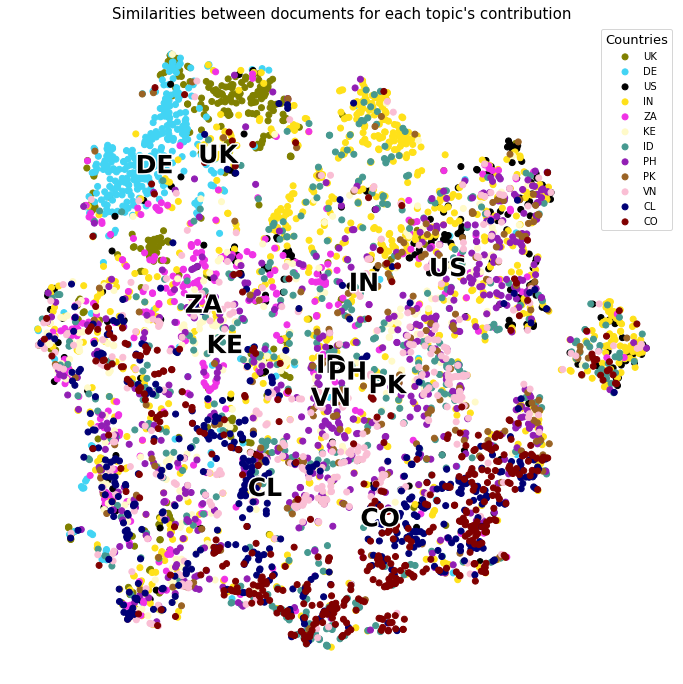

In [50]:
#plot the graph
fig, ax1 = plt.subplots(figsize=(12,12))
#for each category (so I can show them in legend)
for count in df_count_y_med_sorted['Country']: #in the order above (y_median)
    df_g = df_graph_docs_c[df_graph_docs_c['Country']==count].reset_index(drop=True)
    ax1.scatter(x=df_g['x'], y=df_g['y'], color=df_g['hex'], label = count)
    x_med = df_g['x'].median()  #x_mean = df_g['x'].mean() 
    y_med = df_g['y'].median() #y_mean = df_g['y'].mean()
    ax1.annotate(count, (x_med, y_med), fontsize=var_text_size+10, color='k', ha='center', va='center', \
                path_effects=[PathEffects.withStroke(linewidth=3, foreground="w")], weight="bold") #backgroundcolor='w',, weight='bold'
    
#remove spines
for x in ['top', 'bottom', 'right', 'left']: 
    ax1.spines[x].set_visible(False) 

#remove ticks and labels
ax1.tick_params(left = False, labelleft = False, bottom = False, labelbottom = False)

#set title
ax1.set_title("Similarities between documents for each topic's contribution", fontsize=var_text_size)

ax1.legend(loc="upper right", title="Countries", title_fontsize=var_text_size-2)

for y in ['png', 'svg']: 
    plt.savefig('.//results//TSNE//docs_countries_annotate_median_V02.'+y, \
                   bbox_inches="tight") # , dpi=600
plt.show()

### color of dots by dominant topic

#randomly generate 22 colors <br>
from random import randint

list_random_color = []
n = 22

for i in range(n):
    list_random_color.append('#%06X' % randint(0, 0xFFFFFF))

In [60]:
list_random_color = ['#5ACF6E', '#894BF7', '#8D68B3', '#55CC07', '#62723B', '#7C961B', '#410D24',\
 '#36AFEE', '#4F87AB', '#05B74C', '#C51C38', '#7BE4AE', '#620152', '#794380', '#94711E', '#E66500',\
 '#51B4FE', '#3CF6FE', '#D1944E', '#77B4B6', '#F9CCEF', '#5AA292']

In [61]:
#do color for domninant topic per doc
#for each document number, get dominant topic
#make list with correct colors
df_dom_topic = pd.DataFrame(df_perc_only.idxmax(axis = 1)).rename(columns={0:'dom_topic'}).\
            reset_index().rename(columns={'index':'doc_num'})
  
list_dom_topic = list(df_perc_only.columns)
df_topic_hex = pd.DataFrame({'dom_topic':list_dom_topic, 'hex':list_random_color})
#dict(zip(list_country_colors, colors_12))
df_d_color_topic = df_dom_topic.merge(df_topic_hex)
list_colors_dom_topic = df_d_color_topic['hex'] #list with the color per country

In [62]:
#turn into dataframe
df_N_embedded_t = pd.DataFrame(N_embedded).reset_index().rename(columns={0:'x', 1:'y', 'index':'doc_num'})
#merge to get the category & color
df_graph_docs_t = df_N_embedded_t.merge(df_d_color_topic)

In [63]:
#add topic labels
df_graph_docs_t['Topic_num'] = df_graph_docs_t['dom_topic'].str.split('_').apply(lambda x: int(x[1]))
df_aaa = df_topics_categories[['Topic_num', 'Topic_label']]
df_graph_docs_t = df_graph_docs_t.merge(df_aaa)

In [64]:
#do legend in order of median y value per topic_lbry!
df_topic_y_med = pd.DataFrame(columns=['Topic_label', 'y_med'])
for topic_lb in set(df_graph_docs_t['Topic_label']):
    df_g = df_graph_docs_t[df_graph_docs_t['Topic_label']==topic_lb].reset_index(drop=True)
    x_med = df_g['x'].median()
    y_med = df_g['y'].median()
    df_topic_y_med = df_topic_y_med.append({'Topic_label':topic_lb, 'y_med':y_med}, ignore_index=True)

In [65]:
df_topic_y_med_sorted = df_topic_y_med.sort_values('y_med', ascending=False).reset_index(drop=True)

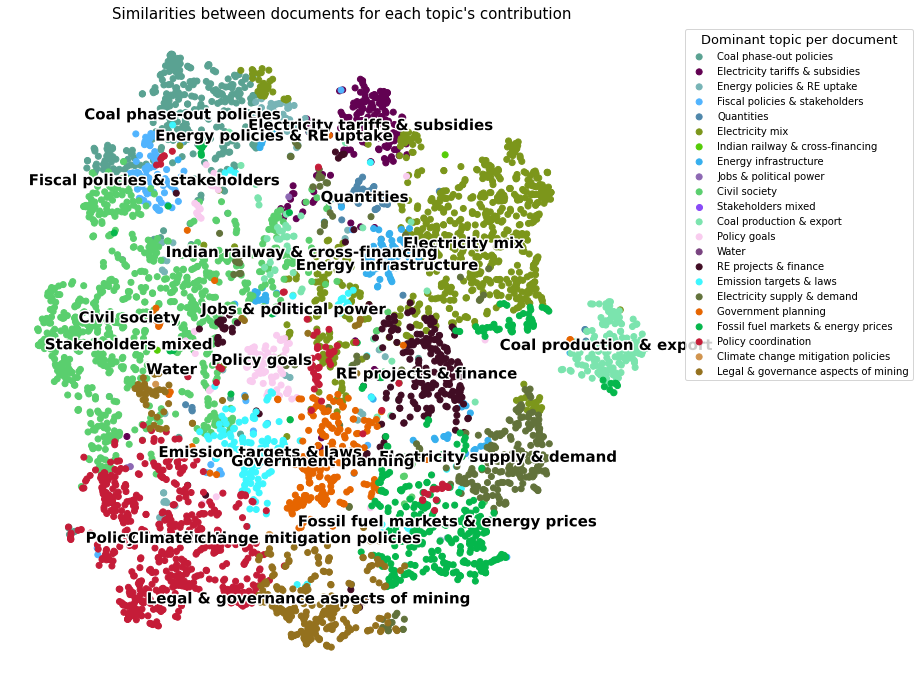

In [66]:
#plot the graph
fig, ax1 = plt.subplots(figsize=(12,12))
#for each category (so I can show them in legend)
for dom_topic in df_topic_y_med_sorted['Topic_label']:
    df_g = df_graph_docs_t[df_graph_docs_t['Topic_label']==dom_topic].reset_index(drop=True)
    ax1.scatter(x=df_g['x'], y=df_g['y'], color=df_g['hex'], label = dom_topic)
    x_med = df_g['x'].median()  #x_mean = df_g['x'].mean() 
    y_med = df_g['y'].median() #y_mean = df_g['y'].mean()
    ax1.annotate(dom_topic, (x_med, y_med), fontsize=var_text_size, color='k', ha='center', va='center', \
                path_effects=[PathEffects.withStroke(linewidth=3, foreground="w")], weight='bold') #backgroundcolor='w',
    #remove spines
for x in ['top', 'bottom', 'right', 'left']: 
    ax1.spines[x].set_visible(False) 

#remove ticks and labels
ax1.tick_params(left = False, labelleft = False, bottom = False, labelbottom = False)

#set title
ax1.set_title("Similarities between documents for each topic's contribution", fontsize=var_text_size)

#set legend
ax1.legend(bbox_to_anchor=(1.005, 1), loc='upper left', title="Dominant topic per document", title_fontsize=var_text_size-2)

for y in ['png', 'svg']: 
    plt.savefig('.//results//TSNE//docs_dominant_topics_annotate_median_V03.'+y, \
                   bbox_inches="tight") # , dpi=600
plt.show()

In [ ]:
## do all docs with color of category of dominant topic? or sum over all topics?